In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read dataset into DataFrame

df = pd.read_csv('youtubers_df.csv')
df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [4]:
# Checking for missing values 

df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [5]:
# Checking for outliers using descriptive statistcs

descriptive_stats = df.describe(include='all')
descriptive_stats

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
count,1000.000000,1000,694,1.000000e+03,1000,1.000000e+03,1.000000e+03,1000.000000,1000
unique,NaN,994,45,NaN,29,NaN,NaN,NaN,994
top,NaN,NickyJamTV,Música y baile,NaN,Estados Unidos,NaN,NaN,NaN,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
freq,NaN,2,160,NaN,293,NaN,NaN,NaN,2
mean,500.500000,NaN,NaN,2.189440e+07,NaN,1.209446e+06,5.363259e+04,1288.768000,NaN
std,288.819436,NaN,NaN,1.682775e+07,NaN,5.229942e+06,2.580457e+05,6778.188308,NaN
min,1.000000,NaN,NaN,1.170000e+07,NaN,0.000000e+00,0.000000e+00,0.000000,NaN
25%,250.750000,NaN,NaN,1.380000e+07,NaN,3.197500e+04,4.717500e+02,2.000000,NaN
50%,500.500000,NaN,NaN,1.675000e+07,NaN,1.744500e+05,3.500000e+03,67.000000,NaN
75%,750.250000,NaN,NaN,2.370000e+07,NaN,8.654750e+05,2.865000e+04,472.000000,NaN


In [6]:
#Filled the missing values in the "Categories" Column with (Unknown) value

df["Categories"].fillna("Unknown", inplace=True)

In [7]:
# Identify trends among the top YouTube streamers. Which categories are the most popular
popular_categories = df['Categories'].value_counts()
popular_categories

Categories
Unknown                               306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor  

In [8]:
# Correlation matrix between the number of subscribers and the number of likes or comments

correlation_matrix = df[['Suscribers', 'Likes', 'Comments']].corr()
correlation_matrix

,Suscribers,Likes,Comments
Suscribers,1.000000,0.211639,0.036350
Likes,0.211639,1.000000,0.325911
Comments,0.036350,0.325911,1.000000


In [9]:
# Total subscribers 

country_counts = df.groupby('Country')['Suscribers'].sum().sort_values(ascending=False)
country_counts

Country
Estados Unidos    6.266600e+09
India             5.823700e+09
Unknown           4.129900e+09
Brasil            1.246900e+09
México            1.151900e+09
Indonesia         7.525000e+08
Rusia             4.264000e+08
Tailandia         3.602000e+08
Colombia          3.354000e+08
Filipinas         2.610000e+08
Pakistán          2.318000e+08
Argentina         1.241000e+08
Francia           8.590000e+07
Iraq              7.870000e+07
Arabia Saudita    7.460000e+07
Turquía           7.220000e+07
Egipto            6.990000e+07
España            6.460000e+07
Bangladesh        5.520000e+07
Japón             5.400000e+07
Reino Unido       5.320000e+07
Argelia           3.150000e+07
Perú              3.140000e+07
Ecuador           2.680000e+07
Marruecos         2.580000e+07
El Salvador       2.190000e+07
Jordania          1.420000e+07
Singapur          1.240000e+07
Somalia           1.170000e+07
Name: Suscribers, dtype: float64

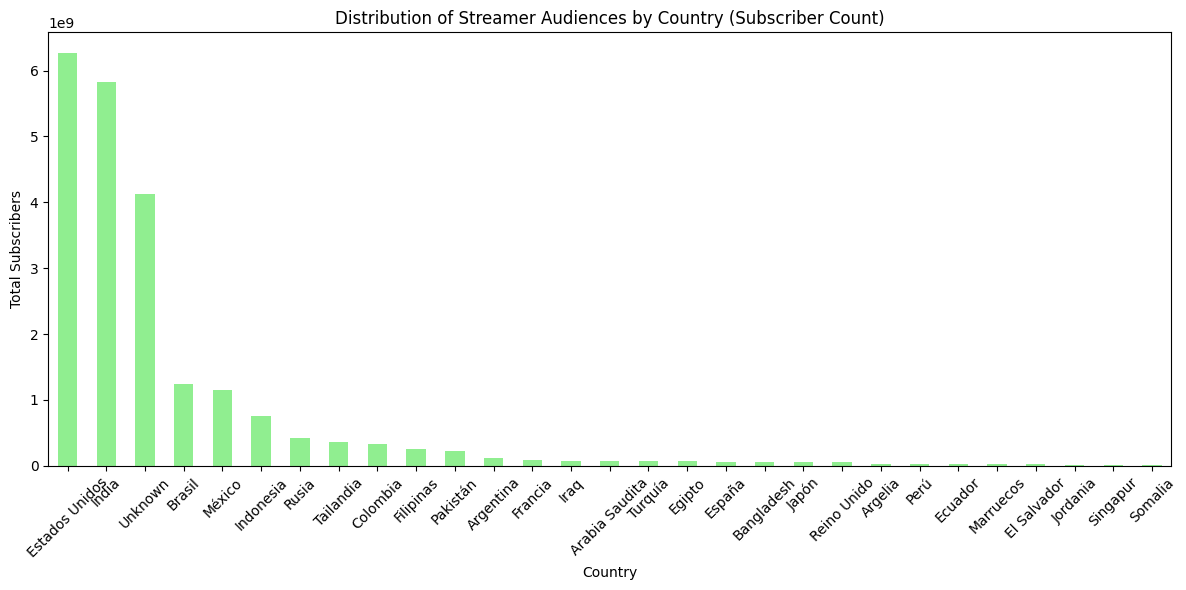

In [10]:
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Streamer Audiences by Country (Subscriber Count)')
plt.xlabel('Country')
plt.ylabel('Total Subscribers')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [11]:
# Created a crosstab to analyze category distribution within each country
country_category_table = pd.crosstab(df['Country'], df['Categories'])
country_category_table

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos",Unknown,"Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios
Country,,,,,,,,,,,,,,,,,,,,,
Arabia Saudita,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Argelia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Argentina,0,0,1,0,0,0,0,0,0,0,...,2,1,0,0,2,0,0,0,0,0
Bangladesh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
Brasil,0,0,3,2,0,0,2,0,0,2,...,12,4,0,1,13,0,0,0,0,2
Colombia,0,0,0,2,0,0,1,0,0,0,...,0,0,0,0,2,0,0,0,0,2
Ecuador,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Egipto,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
El Salvador,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
# Average metrics
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
average_metrics


Suscribers    2.189440e+07
Visits        1.209446e+06
Likes         5.363259e+04
Comments      1.288768e+03
dtype: float64

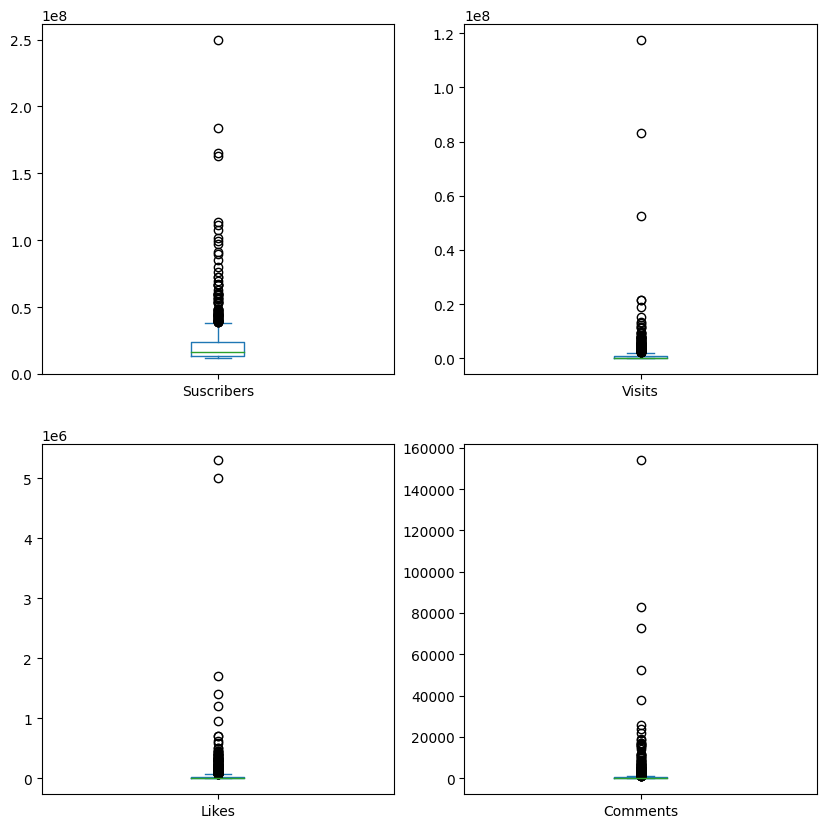

In [13]:
# Visualizing metrics

df[['Suscribers', 'Visits', 'Likes', 'Comments']].plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))
plt.show()

<Axes: title={'center': 'Distribution Of Content Categories'}, xlabel='Categories'>

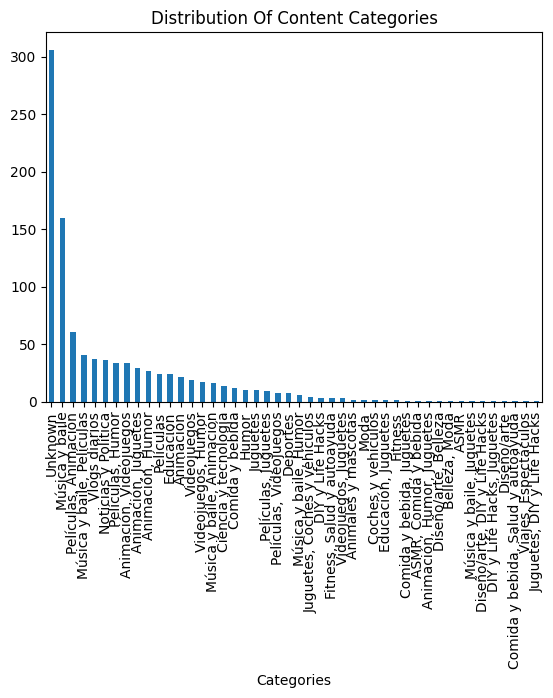

In [14]:
# Distribution of content categories

content_category_distribution = df['Categories'].value_counts()
content_category_distribution.plot(kind='bar', title='Distribution Of Content Categories')

In [15]:
# Top categories by number of streamers

top_categories = content_category_distribution.head()
top_categories


Categories
Unknown                      306
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Name: count, dtype: int64

In [16]:
# Average performance metrics per category
category_performance = df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
category_performance = category_performance.sort_values(by='Suscribers', ascending=False)
category_performance


,Suscribers,Visits,Likes,Comments
Categories,,,,
Juguetes,3.788000e+07,7.005100e+05,5290.200000,2.800000
"Películas, Videojuegos",3.325000e+07,6.940375e+05,48083.375000,1569.500000
"Animación, Juguetes",2.937586e+07,5.254483e+05,2653.068966,0.517241
"Videojuegos, Humor",2.876471e+07,1.023968e+07,420511.764706,4827.058824
Música y baile,2.683688e+07,3.743881e+05,17405.681250,1998.931250
"Diseño/arte, DIY y Life Hacks",2.570000e+07,2.600000e+06,127300.000000,2200.000000
Educación,2.501250e+07,1.106042e+06,45060.750000,1537.250000
Videojuegos,2.498421e+07,1.387137e+06,57121.052632,1760.157895
"Videojuegos, Juguetes",2.473333e+07,5.741667e+05,6400.000000,337.000000


In [17]:
avg_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Filter streamers with above-average performance
above_avg_streamers = df[(df['Suscribers'] > avg_metrics['Suscribers']) & 
                         (df['Visits'] > avg_metrics['Visits']) & 
                         (df['Likes'] > avg_metrics['Likes']) & 
                         (df['Comments'] > avg_metrics['Comments'])]

above_avg_streamers


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
26,27,dudeperfect,Videojuegos,59700000.0,Estados Unidos,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...
34,35,TaylorSwift,Música y baile,54100000.0,Estados Unidos,4300000.0,300400.0,15000.0,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...
39,40,JuegaGerman,"Películas, Animación",48600000.0,México,2000000.0,117100.0,3000.0,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...
43,44,A4a4a4a4,"Animación, Humor",47300000.0,Rusia,9700000.0,330400.0,22000.0,http://youtube.com/channel/UC2tsySbe9TNrI-xh2l...
58,59,Mikecrack,"Películas, Animación",43400000.0,México,2200000.0,183400.0,1800.0,http://youtube.com/channel/UCqJ5zFEED1hWs0KNQC...
62,63,KimberlyLoaiza,Música y baile,42100000.0,México,5300000.0,271300.0,16000.0,http://youtube.com/channel/UCQZfFRohQ7UX-0CdXl...
64,65,luisitocomunica,Unknown,41100000.0,México,2500000.0,128900.0,1800.0,http://youtube.com/channel/UCECJDeK0MNapZbpaOz...
70,71,JessNoLimit,"Películas, Animación",39600000.0,Indonesia,1300000.0,73500.0,1600.0,http://youtube.com/channel/UCvh1at6xpV1ytYOAzx...


In [19]:
# Top performing content creator 

df['performance_score'] = df['Suscribers'] + df['Visits'] + df['Likes'] + df['Comments']
top_performers = df.sort_values(by='performance_score', ascending=False).head(10)
top_performers


,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,performance_score
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,306218500.0
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,249588978.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,172524700.0
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,162615775.0
136,137,MrBeast2,Vlogs diarios,31300000.0,Estados Unidos,83100000.0,5000000.0,11600.0,http://youtube.com/channel/UC4-79UOlP48-QNGgCk...,119411600.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,117412400.0
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,114102200.0
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...,110128000.0
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...,105522100.0
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...,99776932.0
